In [7]:
from granad import core, wrappers
import jax.numpy as jnp
import jax
import numpy as np
import copy

## Attaching an adatom

In this notebook, we will learn how to attach an adatom to a flake.

**Contents of this notebook:**   
Example 2.1. Attaching an adatom to the graphene flake: top position\
Example 2.2. Attaching an adatom to the graphene flake: bridge position\
Example 2.3. Attaching an adatom to the graphene flake: hollow position

----------------------------

With the stack approach, we can treat an adatom simply as another layer; thus, we construct it in a analogous manner. For the sake od demostration, we are going to take into consideration a 2-orbital adatom.

Next, just as in the case of two standard layers (example provided in [tutorial 01](https://github.com/GRANADlauncher/GRANAD-1.0/blob/jax_tutorials/examples/tutorials/tutorial01_initialize_flakes.ipynb), we define the hopping rates and coulomb couplings between the layers.

Here, the convenience of the stack concept is fully visible as its abstraction allows us to treat both the actual materials and adatoms (an important element of the simulations) the same way, simplifying many things further down the road.

Showcased here will be the 3 standard approaches when it comes to positioning of the adatom.

We start with the already well-known process of defining the graphene orbitals.

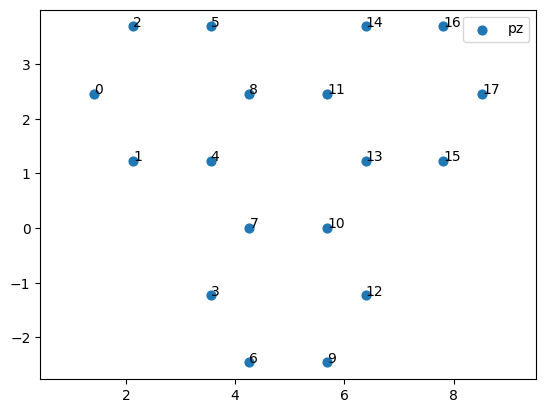

In [8]:
cc_distance = 2.46/np.sqrt(3)            
graphene_armchair_unit = wrappers.unit_cells['armchair'] * cc_distance
graphene_armchair_scale = wrappers.scales['armchair'] * cc_distance

orbs = core.get_orbitals(core.triangle(2), graphene_armchair_unit, graphene_armchair_scale, 'pz', shift = jnp.zeros(3))

h_dict = {}
c_dict = {}

orbs_in_uc = cc_distance * jnp.array(
    [
        [0, 0, 0],
        [1, 0, 0],
        [-1 / 2, -jnp.sqrt(3) / 2, 0],
        [-1 / 2, -jnp.sqrt(3) / 2, 0],
    ]
)

h_dict[('pz', 'pz')] = core.neighbour_coupling( graphene_armchair_unit, orbs_in_uc, [0, -2.66 + 0j])
c_dict[('pz', 'pz')] = core.neighbour_coupling( graphene_armchair_unit, orbs_in_uc, [16.522 + 0j, 8.64 + 0j, 5.333 + 0j], lambda r :  27.21*0.52918/r + 0j)

stack = core.get_stack( orbs, h_dict, c_dict )
wrappers.show_eigenstate2D(stack, indicate_size = False)

The hopping rates and coulomb coupling shall be identical for all 3 cases; thus, we can specify them once and reuse.

The energy levels are st to -1 for the lower and 1 for the upper orbital. One must not forget about the interorbtial coupling, which we will set to 2.0 this time. The coulomb interactions will be turned off for the adatom.

In [9]:
h_dict[('lower', 'lower')] = jax.jit(lambda d : -1 + 0j) 
h_dict[('upper', 'upper')] = jax.jit(lambda d : 1 + 0j) 
h_dict[('upper', 'lower')] = jax.jit(lambda d : 2 + 0j) 

h_dict[('upper', 'pz')] = jax.jit(lambda d : -2.66 / d + 0j) 
h_dict[('lower', 'pz')] = jax.jit(lambda d : -2.66 / d + 0j)

c_dict[('lower', 'lower')] = jax.jit(lambda d : 0j) 
c_dict[('upper', 'upper')] = jax.jit(lambda d : 0j) 
c_dict[('upper', 'lower')] = jax.jit(lambda d : 0j) 

c_dict[('upper', 'pz')] = jax.jit(lambda d : 0j) 
c_dict[('lower', 'pz')] = jax.jit(lambda d : 0j)

### Example 2.1. Attaching an adatom to the graphene flake: top position

Now, we can create the first adatom at the top position; that is, we are going to place it exactly above a chosen orbital. \
In this case, the adatom shall be placed 3 Å above the HOMO orbital of the system.

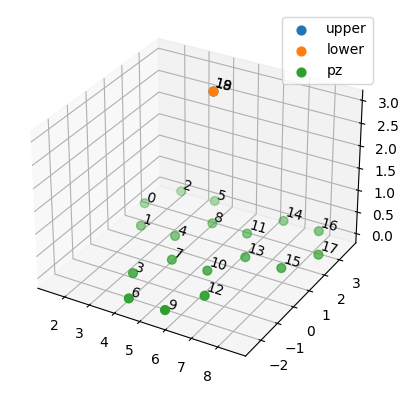

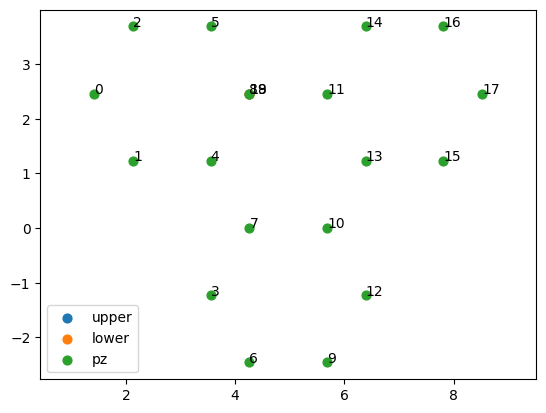

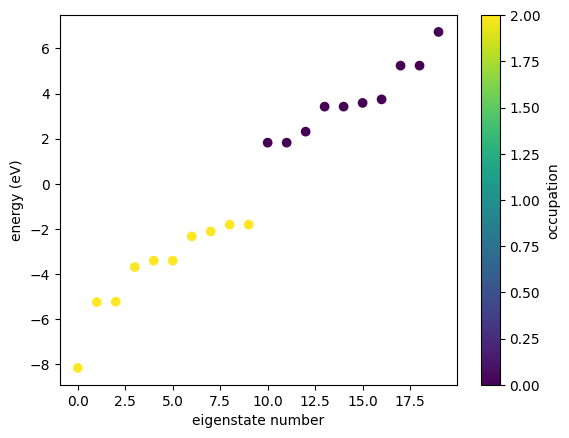

In [10]:
adatom_position = np.array(stack.positions[stack.homo]) + np.array([0, 0, 3]) # the lattice is spread on the xy plain

orbs_top = copy.deepcopy(orbs)

orbs_top.append(core.Orbital( orbital_ident = "lower", position = adatom_position))
orbs_top.append(core.Orbital( orbital_ident = "upper", position = adatom_position))

stack = core.get_stack(orbs_top, h_dict, c_dict)

wrappers.show_eigenstate3D(stack, indicate_size = False)
wrappers.show_eigenstate2D(stack, indicate_size = False)
wrappers.show_energies(stack)

### Example 2.2. Attaching an adatom to the graphene flake: bridge position

Next, the brigde position involves putting the adatom midway between two neighboring atoms. \
Thus, we are going to place it between orbitals 8 and 11 with a 2 Å offset in the z-axis.

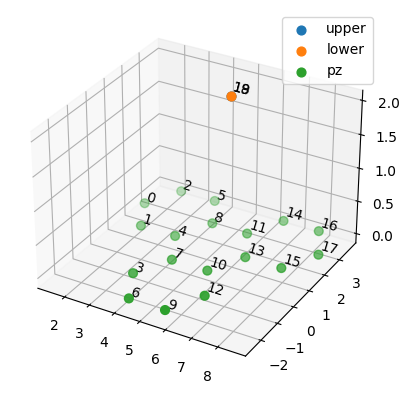

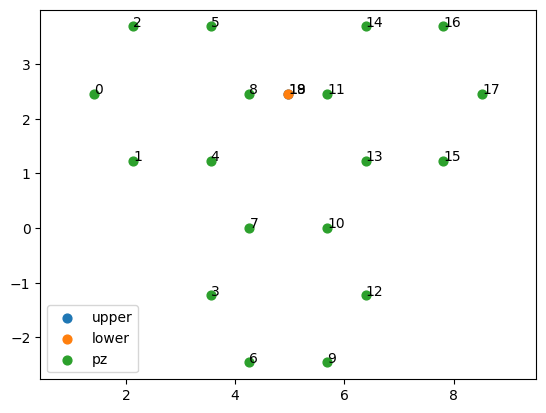

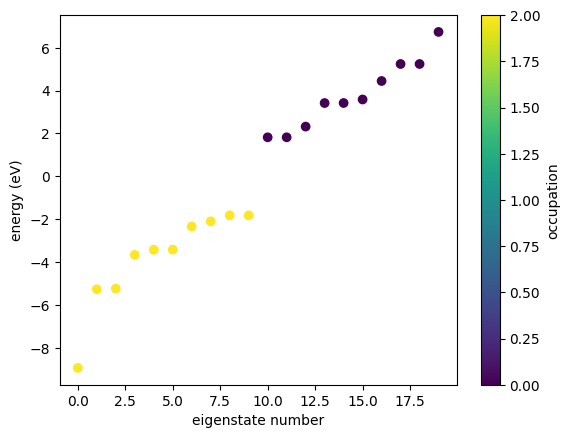

In [11]:
adatom_position = np.array((stack.positions[11] - stack.positions[8]) / 2 + stack.positions[8]) + np.array([0, 0, 2])

orbs_bridge = copy.deepcopy(orbs)

orbs_bridge.append(core.Orbital( orbital_ident = "upper", position = adatom_position))
orbs_bridge.append(core.Orbital( orbital_ident = "lower", position = adatom_position))

stack = core.get_stack(orbs_bridge, h_dict, c_dict)

wrappers.show_eigenstate3D(stack, indicate_size = False)
wrappers.show_eigenstate2D(stack, indicate_size = False)
wrappers.show_energies(stack)

### Example 2.3. Attaching an adatom to the graphene flake: hollow position

The last one is the hollow position signifying that the placement of the adatom in the middle of one of the hexagonal carbon formations constituting the lattice. \
Namely, we will make use of the center one, positioning the adatom orbitals 1 Å above its middle point.

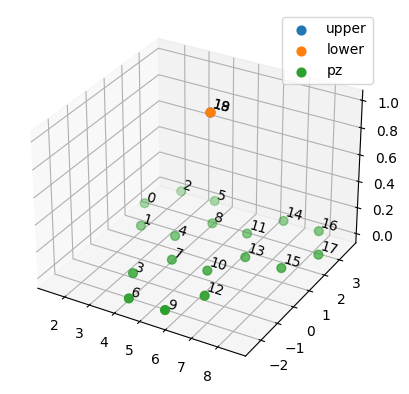

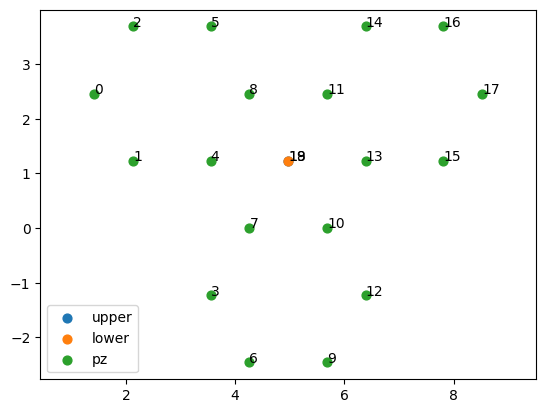

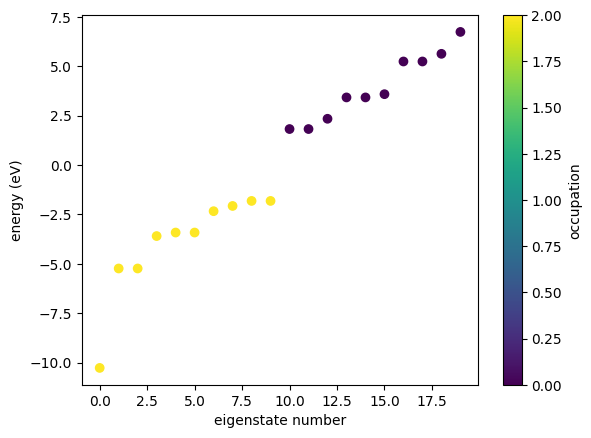

In [12]:
adatom_position = np.array((stack.positions[10] - stack.positions[8]) / 2 + stack.positions[8]) + np.array([0, 0, 1])

orbs_bridge = copy.deepcopy(orbs)

orbs_bridge.append(core.Orbital( orbital_ident = "upper", position = adatom_position))
orbs_bridge.append(core.Orbital( orbital_ident = "lower", position = adatom_position))

stack = core.get_stack(orbs_bridge, h_dict, c_dict)

wrappers.show_eigenstate3D(stack, indicate_size = False)
wrappers.show_eigenstate2D(stack, indicate_size = False)
wrappers.show_energies(stack)